# Screenshot to React Component

In [3]:
import openai
import os
from dotenv import load_dotenv

load_dotenv(verbose=True)

openai.api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI()

In [2]:
def chat_completions(messages):
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=messages,
        max_tokens=4096,
        temperature=0
    )
    return response

In [4]:
SYSTEM_PROMPT = """
You are an expert React developer
You take screenshots of a reference react component from the user, and then build single react component
using TypeScript.

- Make sure the component looks exactly like the screenshot.
- Pay close attention to background color, text color, font size, font family, 
padding, margin, border, etc. Match the colors and sizes exactly.
- Use the exact text from the screenshot.
- Do not add comments in the code such as "// Add other navigation links as needed" and "// ... other news items ..." in place of writing the full code. WRITE THE FULL CODE.
- Repeat elements as needed to match the screenshot. For example, if there are 15 items, the code should have 15 items. DO NOT LEAVE comments like "<!-- Repeat for each news item -->" or bad things will happen.
- For images, use placeholder images from https://placehold.co and include a detailed description of the image in the alt text so that an image generation AI can generate the image later.

Return only the full code in tsx format.
Do not include markdown "```" or "```tsx" at the start or end.

Checkbox component example: 

type CheckboxProps = {
  checked: boolean;
  onChange: (checked: boolean) => void;
};

export const Checkbox: React.FC<CheckboxProps> = ({ checked, onChange }) => {
  return (
    <input
      type="checkbox"
      checked={checked}
      onChange={(e) => onChange(e.target.checked)}
    />
  );
};
"""

USER_PROMPT = """
Generate code for a component that looks exactly like this.
"""


In [5]:
def assemble_prompt(base64_image):
    return [
        {"role": "system", "content": SYSTEM_PROMPT},
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url", 
                    "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
                },
                {
                    "type": "text",
                    "text": USER_PROMPT,
                },
            ],
        },
    ]

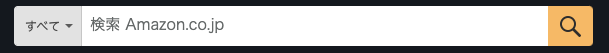

In [2]:
from PIL import Image

image_path = "./data/component_screenshot.png"
Image.open(image_path)

In [7]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [8]:
base64_image = encode_image(image_path)

In [9]:
prompt = assemble_prompt(base64_image)

In [10]:
response = chat_completions(prompt)
print(response)

ChatCompletion(id='chatcmpl-8M9mTIjuMGABh6ixsxPEQOL4CwRQl', choices=[Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content='import React from \'react\';\n\ntype SearchBarProps = {\n  placeholder: string;\n  onSearch: (value: string) => void;\n};\n\nexport const SearchBar: React.FC<SearchBarProps> = ({ placeholder, onSearch }) => {\n  const [searchValue, setSearchValue] = React.useState(\'\');\n\n  const handleSearchChange = (event: React.ChangeEvent<HTMLInputElement>) => {\n    setSearchValue(event.target.value);\n  };\n\n  const handleSearchSubmit = (event: React.FormEvent<HTMLFormElement>) => {\n    event.preventDefault();\n    onSearch(searchValue);\n  };\n\n  return (\n    <form onSubmit={handleSearchSubmit} style={{ display: \'flex\', alignItems: \'center\', backgroundColor: \'#f0f0f0\', padding: \'4px 8px\', borderRadius: \'4px\' }}>\n      <span style={{ marginRight: \'8px\', color: \'#555\', fontSize: \'14px\' }}>すべて</span>\n      <input\n        type="text"

In [14]:
# write to file
with open("../nextjs-project/src/components/SearchBar.tsx", "w") as f:
    f.write(response.choices[0].message.content)

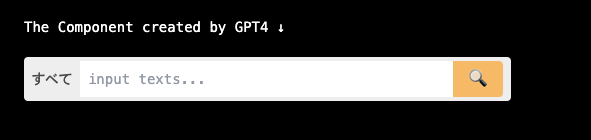

In [4]:
# The screenshot of the component on Next.js
Image.open("./output/component_screenshot.png")